# Task 1. (12 점) csv 파일을 다운로드 받고 pandan를 이용하여 불러오기

Task 1-1. (6 점) 데이터 불러오기

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
data = pd.read_csv('./owid-covid-data.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

Task 1-2. (6 점) 'date'열의 데이터를 날짜 타입으로 변경하기

In [36]:
data['date'] # 기존 data type : object

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
127812    2021-10-28
127813    2021-10-29
127814    2021-10-30
127815    2021-10-31
127816    2021-11-01
Name: date, Length: 127817, dtype: object

In [37]:
data['date'] = pd.to_datetime(data['date'])
data['date'] # 변경 후 data type : datetime

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
127812   2021-10-28
127813   2021-10-29
127814   2021-10-30
127815   2021-10-31
127816   2021-11-01
Name: date, Length: 127817, dtype: datetime64[ns]

# Task 2. (32 점) (한국과 일본의 코로나 상황과 대응 차이는 어떨까?) 한국(South Korea)과 일본(Japan)의 코로나 상황 비교 시각화하기

In [38]:
south_korea_data = data[data['location'] == 'South Korea']
japan_data = data[data['location'] == 'Japan']

# 연속적인 그래프 출력을 위한 결측치 보정
south_korea_data= south_korea_data.interpolate()
japan_data = japan_data.interpolate()

Task 2-1. (8 점) 날짜별 확진자 비율 (total_cases_per_million) 시각화

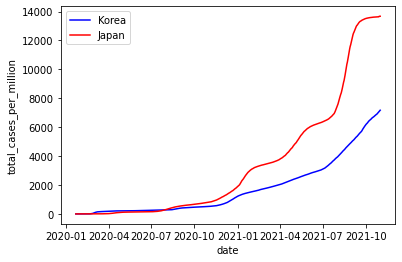

In [39]:
plt.plot(south_korea_data['date'], south_korea_data['total_cases_per_million'], color = 'blue', label = 'Korea')
plt.plot(japan_data['date'], japan_data['total_cases_per_million'], color = 'red', label = 'Japan')

plt.xlabel("date")
plt.ylabel("total_cases_per_million")

plt.legend()
plt.show()

Task 2-2. (8 점) 날짜별 신규 확진자 비율 (new_cases_per_million) 시각화

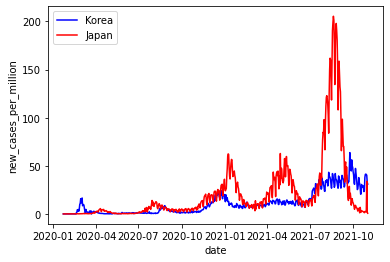

In [40]:
plt.plot(south_korea_data['date'], south_korea_data['new_cases_per_million'], color = 'blue', label = 'Korea')
plt.plot(japan_data['date'], japan_data['new_cases_per_million'], color = 'red', label = 'Japan')

plt.xlabel("date")
plt.ylabel("new_cases_per_million")

plt.legend()
plt.show()

Task 2-3. (8 점) 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화

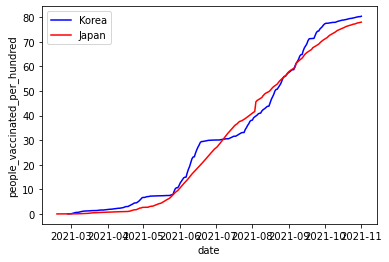

In [41]:
plt.plot(south_korea_data['date'], south_korea_data['people_vaccinated_per_hundred'], color = 'blue', label = 'Korea')
plt.plot(japan_data['date'], japan_data['people_vaccinated_per_hundred'], color = 'red', label = 'Japan')

plt.xlabel("date")
plt.ylabel("people_vaccinated_per_hundred")

plt.legend()
plt.show()

Task 2-4. (8 점) 날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred) 시각화

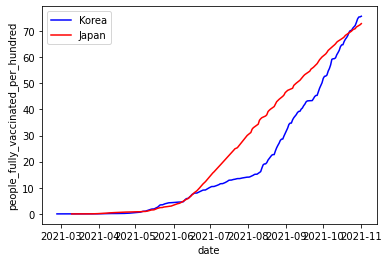

In [42]:
plt.plot(south_korea_data['date'], south_korea_data['people_fully_vaccinated_per_hundred'], color = 'blue', label = 'Korea')
plt.plot(japan_data['date'], japan_data['people_fully_vaccinated_per_hundred'], color = 'red', label = 'Japan')

plt.xlabel("date")
plt.ylabel("people_fully_vaccinated_per_hundred")

plt.legend()
plt.show()

# Task3. (31 점) (백신 접종은 사망률을 낮출까?) 백신 접종률(people_vaccinated_per_hundred)과 확진자 비율 대비 사망자 비율(total_deaths_per_million/total_cases_per_million) 사이의 상관관계 알아보기

Task 3-1. (5 점) Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기
*   location
*   date
*   total_deaths_per_million
*   total_cases_per_million
*   people_vaccinated_per_hundred
*   human_development_index (Task 4에서 사용)










In [43]:
data2 = data[['location','date','total_deaths_per_million','total_cases_per_million','people_vaccinated_per_hundred','human_development_index']]
data2

,location,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,2020-02-24,NaN,0.126,NaN,0.511
1,Afghanistan,2020-02-25,NaN,0.126,NaN,0.511
2,Afghanistan,2020-02-26,NaN,0.126,NaN,0.511
3,Afghanistan,2020-02-27,NaN,0.126,NaN,0.511
4,Afghanistan,2020-02-28,NaN,0.126,NaN,0.511
...,...,...,...,...,...,...
127812,Zimbabwe,2021-10-28,309.763,8804.565,21.91,0.571
127813,Zimbabwe,2021-10-29,309.763,8807.613,21.97,0.571
127814,Zimbabwe,2021-10-30,309.763,8807.613,22.00,0.571
127815,Zimbabwe,2021-10-31,309.962,8810.992,22.02,0.571


Task 3-2. (6 점) 각 국가별로 가장 최근 날짜의 데이터 추출하기 (Hint! pandas의 groupby와 max 활용)

In [44]:
recent_data = data2.groupby(data2['location']).max()
recent_data

,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
location,,,,,
Afghanistan,2021-11-01,182.777,3923.241,6.06,0.511
Africa,2021-11-01,159.008,6191.136,8.93,NaN
Albania,2021-11-01,1020.211,64567.094,35.29,0.795
Algeria,2021-11-01,132.776,4629.799,14.26,0.748
Andorra,2021-11-01,1680.585,200584.327,70.30,0.868
...,...,...,...,...,...
Wallis and Futuna,2021-11-01,NaN,NaN,53.52,NaN
World,2021-11-01,635.699,31383.570,49.63,0.737
Yemen,2021-11-01,61.986,321.377,1.07,0.470


Task 3-3. (10 점) 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot 그리기

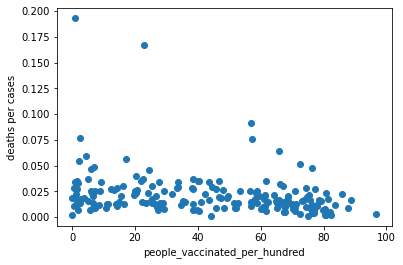

In [45]:
# Task 3-2 에서의 데이터프레임 사용
x = recent_data['people_vaccinated_per_hundred']
y = recent_data['total_deaths_per_million']/recent_data['total_cases_per_million']

plt.scatter(x,y)

plt.xlabel("people_vaccinated_per_hundred")
plt.ylabel("deaths per cases")

plt.show()

Task 3-4. (10 점) 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (함수 직접 구현)

In [53]:
recent_data = recent_data.dropna()

X = recent_data['people_vaccinated_per_hundred']
Y = recent_data['total_deaths_per_million']/recent_data['total_cases_per_million']

#상관계수를 구하기 위한 함수들
def mean(inp):
    result = 0
    len_inp = len(inp)    
    for i in inp:
        result += i
    result = result / len_inp
    return result

def sqrt(inp):
    result = inp/2
    for i in range(100):
        result = (result + (inp / result)) / 2
    return result

# 메인 함수
def cor(inp1, inp2):
    # 평균 먼저 계산
    mean_inp1 = mean(inp1)
    mean_inp2 = mean(inp2)
    
    # 분자
    son = 0
    for i in range(len(inp1)):
        son += (inp1[i] - mean_inp1) * (inp2[i] - mean_inp2)
    
    # 분모
    x_mom = 0
    for i in range(len(inp1)):
        x_mom += (inp1[i] - mean_inp1) ** 2
    y_mom = 0
    for i in range(len(inp2)):
        y_mom += (inp2[i] - mean_inp2) ** 2
    mom = sqrt(x_mom) * sqrt(y_mom)
    
    result = son / mom
    return result

print("Pearson Correlation Coefficient:",cor(X, Y))

Pearson Correlation Coefficient: -0.2527869014921183


# Task 4. (25 점) (백신 접종은 전세계적으로 골고루 이뤄지고 있을까?) HDI 계수(human_develpoment_index)와 백신 접종률(people_vaccinated_per_hundred) 사이의 상관관계 알아보기 (Task 3-2 에서 구한 데이터프레임 활용)

Task 4-1. (5 점) Task 3-2에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (Task 3-4에서 구현한 함수 사용 혹은 기타 다른 방법 활용 가능)

In [54]:
X = recent_data['human_development_index']
Y = recent_data['people_vaccinated_per_hundred']

# Task 3-4 함수 사용
print("Pearson Correlation Coefficient:", cor(X, Y))

Pearson Correlation Coefficient: 0.8223528627985829


Task 4-2. (10 점) Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)

In [55]:
import torch

X = recent_data['human_development_index']
Y = recent_data['people_vaccinated_per_hundred']

x_train = torch.tensor(X)
y_train = torch.tensor(Y)

W = torch.zeros(1,1, dtype=torch.float)
b = torch.zeros(1,1, dtype=torch.float)
lr = 0.1

for epoch in range(5001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = W*x_train + b
  cost = torch.mean((hypothesis - y_train) ** 2)

  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}'.format(epoch, cost.item(), W.squeeze(), b))

epoch: 0, cost: 2536.594023, W: 6.8033061027526855, b: tensor([[8.4404]])
epoch: 100, cost: 455.465814, W: 54.28913879394531, b: tensor([[3.8581]])
epoch: 200, cost: 361.439442, W: 78.83755493164062, b: tensor([[-14.2180]])
epoch: 300, cost: 309.340896, W: 97.11061096191406, b: tensor([[-27.6732]])
epoch: 400, cost: 280.473884, W: 110.71249389648438, b: tensor([[-37.6889]])
epoch: 500, cost: 264.479074, W: 120.83732604980469, b: tensor([[-45.1443]])
epoch: 600, cost: 255.616587, W: 128.37393188476562, b: tensor([[-50.6938]])
epoch: 700, cost: 250.706029, W: 133.9839324951172, b: tensor([[-54.8247]])
epoch: 800, cost: 247.985144, W: 138.1598663330078, b: tensor([[-57.8997]])
epoch: 900, cost: 246.477539, W: 141.268310546875, b: tensor([[-60.1885]])
epoch: 1000, cost: 245.642187, W: 143.58216857910156, b: tensor([[-61.8923]])
epoch: 1100, cost: 245.179341, W: 145.3045196533203, b: tensor([[-63.1606]])
epoch: 1200, cost: 244.922892, W: 146.58653259277344, b: tensor([[-64.1046]])
epoch: 13

In [56]:
print(f"W: {W}, b: {b}" )

W: tensor([[150.3175]]), b: tensor([[-66.8519]])


Task 4-3. (10 점) HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서 학습한 직선을 겹쳐 그리기 (scatter plot과 직선이 일치하는지 확인하여 학습이 제대로 되었는지 확인)

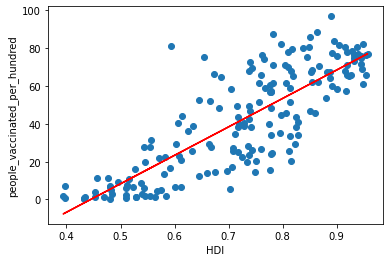

In [57]:
# Task 4-2로부터 얻은 W, b 값
W = 150.3175
b = -66.8519

X = recent_data['human_development_index']
Y = recent_data['people_vaccinated_per_hundred']

plt.scatter(X,Y)
plt.plot(X, W*X +b, 'r')
plt.xlabel("HDI")
plt.ylabel("people_vaccinated_per_hundred")
plt.show()